# Introduction

Oscilloscopes are essential tools for electrical engineering. They allow complex
electrical signals to be viewed in the time and frequency domains (i.e. modern
Fast Fourier Transform capable devices) for analysis. In this lab, we learn how
to use a digital oscilloscope's functions and work with root-mean-square AC
voltage measurements.

# Problem 1

**Part 1:**

The oscilloscope shows what would be expected for the input signal from the
function generator. The x-axis shows a time range centered around 0 seconds
which goes around 1 milisecond in both directions. The y-axis shows the voltage.
The trigger level is set at 0 V (the arrows on each side of the graph).

![Function Generator and Oscilloscope](p1p1.png)

**Part 2:**

- Trigger level 200 mV: The graph shifts to the left (to adjust to the new
  "starting" voltage).
- Trigger level 500 mV: The graph shifts more to the left.
- Trigger level 1 V: The graph no longer stays still showing a set cycle, but
  instead the raw signal.
- Trigger level 2 V: The same as at 1 V, since there is no voltage to start
  recording a set cycle.

**Part 3:**

When the trigger condition is set to rising, for the oscilliscope to start
recording, the voltage at the trigger level must be increasing, whereas it must
be decreasing when the condition is set to falling:

![Rising Condition](rising.png)

![Falling Condition](falling.png)

# Problem 2

**Part 1:** The measured peak-to-peak value was 1.9776 V.

![Peak to Peak Measurement](p2p.png)

**Part 2:** For the original sinusoidal function (for reference):

![Sine Wave Data](sin_data.png)

For the other three functions, the results were:

| Type of Signal | Amplitude (V) | Period (us) | Frequency (kHz) |
|----------------|---------------|-------------|-----------------|
| Ramp           | 0.74670       | 200.00      | 5.0000          |
| Square         | 0.99291       | 200.00      | 5.0000          |
| Triangular     | 0.25707       | 199.96      | 5.0010          |

One thing worth noting was that the period and frequency measurements for the
non-sine waves were exact, unlike the sine wave itself. Also, the accuracy of
the amplitude measurement seemed to have a lot to do with the amount of time
spend by the function at the amplitude (e.g. square waves spend more time there
then ramp waves). The triangular wave had a lot of trouble measuring the
amplitude, and was not exact with its period and frequency.

# Problem 3

**Part 1:** Since the peak-to-peak voltage is 2 V, the amplitude of the sinusoid
is 1 V. Therefore, assuming $V=0$ and $\frac{dV}{dt}=1$ at $t=0$:

$$ V(t) = 1 \sin{t} $$

To find the room mean square:

$$ V(t)^2 = 1 \sin^2{t} = \frac{1}{2}(1-\cos{2t}) $$

The average of a cosine wave across its period is 0, thus:

$$ V_{\mathrm{RMS}}^2 = \frac{1}{2} \implies V_{\mathrm{RMS}} =
\frac{1}{\sqrt{2}} = \frac{\sqrt{2}}{2} = \boxed{0.707\,\mathrm{V}} $$

**Part 2:**

| Waveform   | V_m (V) | V_peak  | V_m/V_peak |
|------------|---------|---------|------------|
| Sine       | 0.714   | 0.99930 | 0.7145     |
| Triangular | 0.560   | 0.87480 | 0.6401     |
| Square     | 1.115   | 0.99935 | 1.1157     |

**Part 3:** *Yes.* 0.714 V is very close to the predicted value of 0.707 V.

**Part 4:** The integral of the *square* of each wave across their respective
periods are not the same. For example, a square wave's integral works out like
so, as opposed to a sine wave:

$$ V_{\mathrm{RMS}} = \sqrt{\frac{1}{T}\int_0^T V_p^2 dt} =
\sqrt{\frac{1}{T}[V_p^2t]^T_0} = \sqrt{\frac{1}{T}V_p^2T} = \sqrt{V_p^2} = V_p
$$

**Part 5:** The multimeter I used correctly measured the value of
$V_{\mathrm{RMS}}$ for all the waveforms. However, the ratios from the
multimeter were not dependent on the waveform, and they only nearly agreed with
the oscilloscope. The multimeter is measuring the sure $V_{\mathrm{RMS}}$.

**Part 6:**

| Frequency | V_osc,rms | V_mm,rms | V_mm,rms/V_fg,rms | V_mm,rms/V_fg,rms [dB] |
|-----------|-----------|----------|-------------------|------------------------|
| 500 Hz    | 0.80315   | 0.812    | 1.0110            | 0.0951                 |
| 1 kHz     | 0.80593   | 0.805    | 0.9988            | -0.0100                |
| 10 kHz    | 0.79854   | 0.432    | 0.5409            | -5.3362                |
| 20 kHz    | 0.79609   | 0.203    | 0.2549            | -11.8693               |
| 100 kHz   | 0.79663   | 0.038    | 0.0477            | -26.4294               |
| 1 MHz     | 0.79065   | 0.008    | 0.0101            | -39.8978               |
| 2 MHz     | 0.78949   | 0.005    | 0.0063            | -43.9675               |
| 5 MHz     | 0.75453   | 0.003    | 0.0039            | -48.0111               |
| 10 MHz    | 0.67683   | 0.001    | 0.0014            | -56.6095               |

**Part 7:**


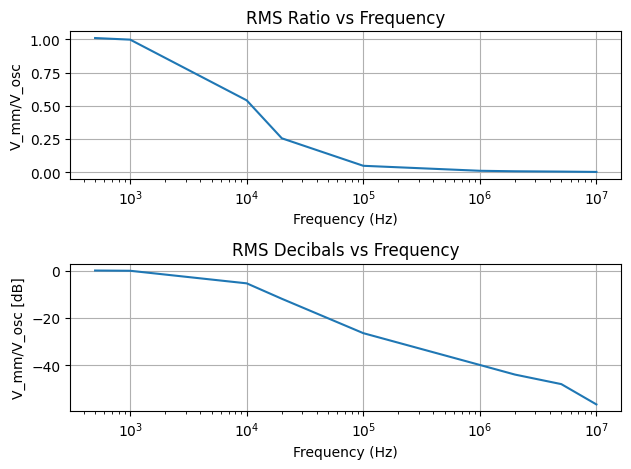

In [ ]:
from math import *

import matplotlib.pyplot as plt
import numpy as np

freq = np.array([500, 1e3, 10e3, 20e3, 100e3, 1e6, 2e6, 5e6, 10e6])

v_osc = np.array(
    [
        0.80315,
        0.80593,
        0.79854,
        0.79609,
        0.79663,
        0.79065,
        0.78949,
        0.75453,
        0.67683,
    ]
)

v_mm = np.array(
    [
        0.812,
        0.805,
        0.432,
        0.203,
        0.038,
        0.008,
        0.005,
        0.003,
        0.001,
    ]
)

v_div = v_mm / v_osc

v_db = 20 * np.log10(v_div)

fig, (ax1, ax2) = plt.subplots(2)

ax1.set_title("RMS Ratio vs Frequency")
ax1.semilogx(
    freq, v_div
)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('V_mm/V_osc')
ax1.grid()

ax2.set_title("RMS Decibels vs Frequency")
ax2.semilogx(
    freq, v_db
)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('V_mm/V_osc [dB]')
ax2.grid()

fig.tight_layout()


**Part 8:** The two plots are very similar, however the RMS Ratio plot looks
more like a *sigmoid curve* and shows only the ratio. The decibel version is
much more *linear* and shows the signals' relative power.

**Part 9:** The multimeter's sampling ratio, for measuring the RMS of the AC
voltage, is much lower than that of the oscilloscope. So, when averaging, it
slowly approaches 0, instead of staying at the true value.

# Conclusion

This lab was a success. Many of the principles of oscilloscopes were
demonstrated, and some data was gathered and analysized. The issues with
measuring the RMS voltage of high frequency signals using a multimeter was also
demonstrated and shown graphically. Unfortunately, it took a bit longer than the
others, but hopeful the last three labs after this one won't take too long.


